### 住宅価格の回帰
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

House Prices: Advanced Regression Techniques

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト  
分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

### データセットの準備

House Prices: Advanced Regression Techniques | Kaggle


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


### 回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、GrLivArea(地上のリビングエリアの平方フィート)とYearBuilt(当初工事日)の2つだけを利用することにします。

### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [4]:
df = pd.read_csv("train.csv")

df_selected=df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

X_train.shape:(1095, 2), X_test.shape:(365, 2)
MSE : 2314465092.732015


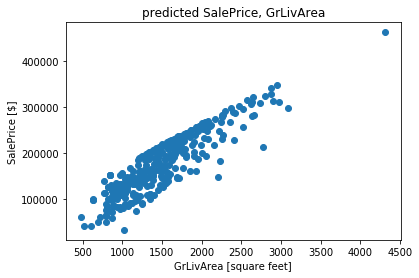

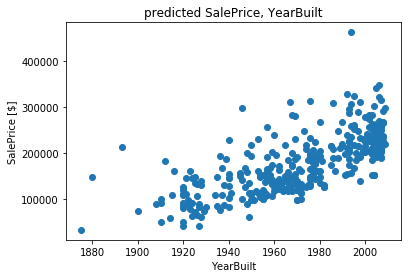

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#データの分割
X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "SalePrice"], test_size=0.25, random_state=42)
#df_selected.iloc[:, :-1]は"GrLivArea", "YearBuilt"のカラム

#データの確認
print("X_train.shape:{}, X_test.shape:{}". format(X_train.shape, X_test.shape))

#モデルに引数を渡してインスタンス化する
linear_reg = LinearRegression()

#.fit(X_train, y_train)でモデルに学習させる
linear_reg.fit(X_train, y_train)

#推定　.predict(X_test)
y_pred = linear_reg.predict(X_test)

#平均二乗誤差(標準偏差、ばらつき、MSE)を求める。
#実際の値と予測値の絶対値の 2 乗の平均。この為、MAE に比べて大きな誤差が存在するケースで、大きな値を示す特徴
MSE = mean_squared_error(y_test, y_pred)

print("MSE : {}".format(MSE))

# 可視化
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred)
plt.show()

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰 from sklearn.linear_model import LogisticRegression
- SVM from sklearn.svm import SVC
- 決定木 from sklearn.tree import DecisionTreeRegressor
- ランダムフォレスト   from sklearn.ensemble import RandomForestRegressor
公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



Linear Regression
MSE : 2314465092.732015


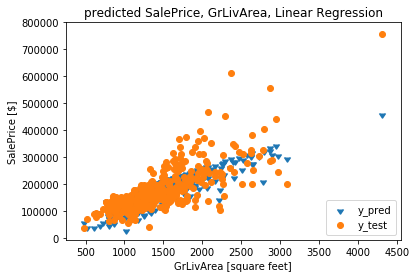

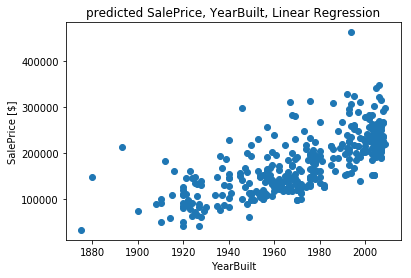

SVM
MSE : 7188819734.040301


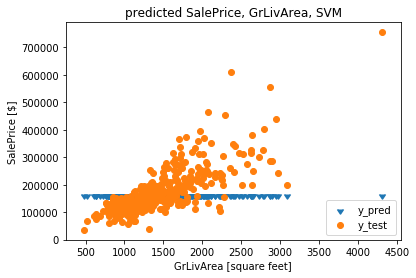

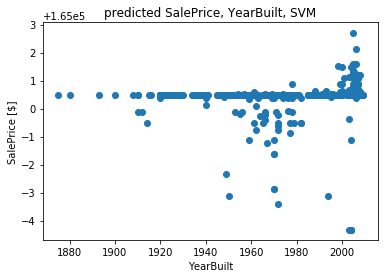

Decision Tree
MSE : 2282520603.266058


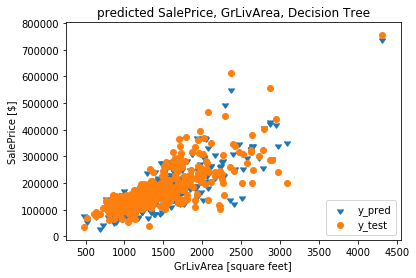

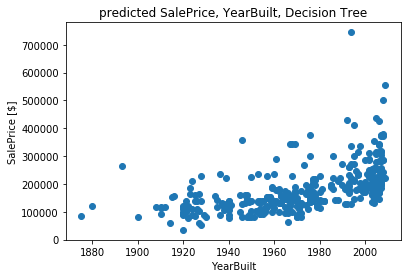

Random Forest
MSE : 1736305870.9049528


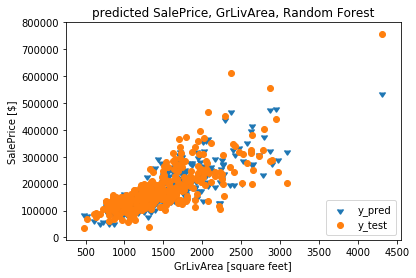

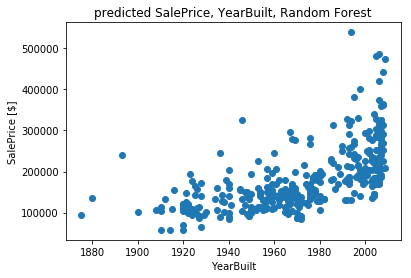

In [16]:
# sklearnのから各種モデルをimportする
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# importしたモデルをインスタンス化
linear_reg = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# 可視化
models = [linear_reg, svr, tree, random_forest] #インスタンス化したモデルをリストに格納
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]#モデルの名前
mse_list = []#MSEの値をリストに追加していく

for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))

    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["GrLivArea"], y_pred, marker=11, label="y_pred")
    plt.scatter(X_test["GrLivArea"], y_test, label="y_test")
    plt.legend(loc='lower right')
    plt.show()

    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["YearBuilt"], y_pred)
    plt.show()

In [7]:
import pandas as pd
mse_list = pd.DataFrame([mse_list] , columns = (model_names))
mse_list

,Linear Regression,SVM,Decision Tree,Random Forest
0,2.314465e+09,7.188820e+09,2.495373e+09,1.676290e+09


MSEの値からランダムフォレストが最も精度が高く、SVMが最も低い。
